# Simple Machine Learining Models

Input: single principal component based on all 15 indicators 

Output: optimal max-shape portfolio with tight restrictions for the next period

In [1]:
import numpy as np

import os
os.chdir(os.path.expanduser('../'))

from helper_functions import run_full_backtesting

In [2]:
os.chdir(os.path.expanduser('../data'))

from dotenv import load_dotenv
load_dotenv()

from DataProvider import DataProvider

In [3]:
data_provider = DataProvider()
x = data_provider.get_formatted_features(flatten=True)
y = data_provider.get_formatted_targets()
x_train, y_train, _, _, x_test, y_test = data_provider.train_train_split(x, y, with_val=False)

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


## Random Forest

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
regressor_random_forest = RandomForestRegressor(n_estimators=32,
                                                random_state=42)
regressor_random_forest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=32, random_state=42)

Checking example predictions

In [6]:
predictions = regressor_random_forest.predict(x_test)

In [7]:
predictions[0].round(3)

array([0.54 , 0.053, 0.058, 0.034, 0.028, 0.027, 0.023, 0.022, 0.012,
       0.011, 0.012, 0.011, 0.01 , 0.008, 0.01 , 0.007, 0.008, 0.006,
       0.029, 0.016, 0.012, 0.015, 0.013, 0.008, 0.009, 0.008, 0.01 ])

In [8]:
y_test[0]

array([0.576, 0.046, 0.075, 0.023, 0.02 , 0.039, 0.017, 0.016, 0.007,
       0.008, 0.02 , 0.005, 0.02 , 0.02 , 0.004, 0.002, 0.002, 0.002,
       0.024, 0.025, 0.02 , 0.012, 0.006, 0.003, 0.004, 0.002, 0.002])

Checking portfolios to match 1.0

In [9]:
preditions_sum = predictions.sum(axis=1)
preditions_sum

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [10]:
preditions_sum = preditions_sum.reshape(predictions.shape[0], 1)
predictions = np.divide(predictions, preditions_sum)

In [11]:
predictions.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

## Gradient Boosting

In [12]:
import xgboost as xgb

In [13]:
regressor_xg_boosting = xgb.XGBRegressor(n_estimators=32,
                                         random_state=42)
regressor_xg_boosting.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=32, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [14]:
xg_boost_predictions = regressor_xg_boosting.predict(x_test)
xg_boost_predictions.sum(axis=1)

array([1.0389661 , 0.9141442 , 0.98777604, 0.93872166, 0.97078073,
       0.956609  , 0.9878149 , 1.0028472 , 0.97694355, 0.9873504 ,
       0.97223115, 1.0630635 , 1.0751284 , 0.92559105, 1.0744003 ,
       1.0622602 , 1.1007553 , 1.0686413 , 0.9390935 , 1.0451963 ,
       1.0929835 , 1.0870466 , 1.0805082 , 1.0807749 , 1.0822631 ,
       1.151846  , 1.1514856 , 1.1632307 , 0.98969054, 1.0805562 ,
       1.017005  , 1.0991863 , 1.09642   , 1.1076908 , 1.0156164 ,
       0.9970982 , 0.9696332 , 1.0092733 , 1.0306538 , 1.0276518 ,
       0.9193015 , 1.0380133 , 0.98684174, 0.99195373, 0.9690817 ,
       0.99734414, 0.8946183 , 0.9542099 , 0.9978758 , 0.96568   ,
       0.99440825, 0.9657613 , 1.109955  , 1.0811813 , 1.1056783 ,
       1.0800457 , 1.0430118 , 0.9660404 ], dtype=float32)

In [15]:
xg_boost_preditions_sum = xg_boost_predictions.sum(axis=1).reshape(xg_boost_predictions.shape[0], 1)
xg_boost_predictions = np.divide(xg_boost_predictions, xg_boost_preditions_sum)

In [16]:
xg_boost_predictions.sum(axis=1).round(3)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.], dtype=float32)

## Backtesting

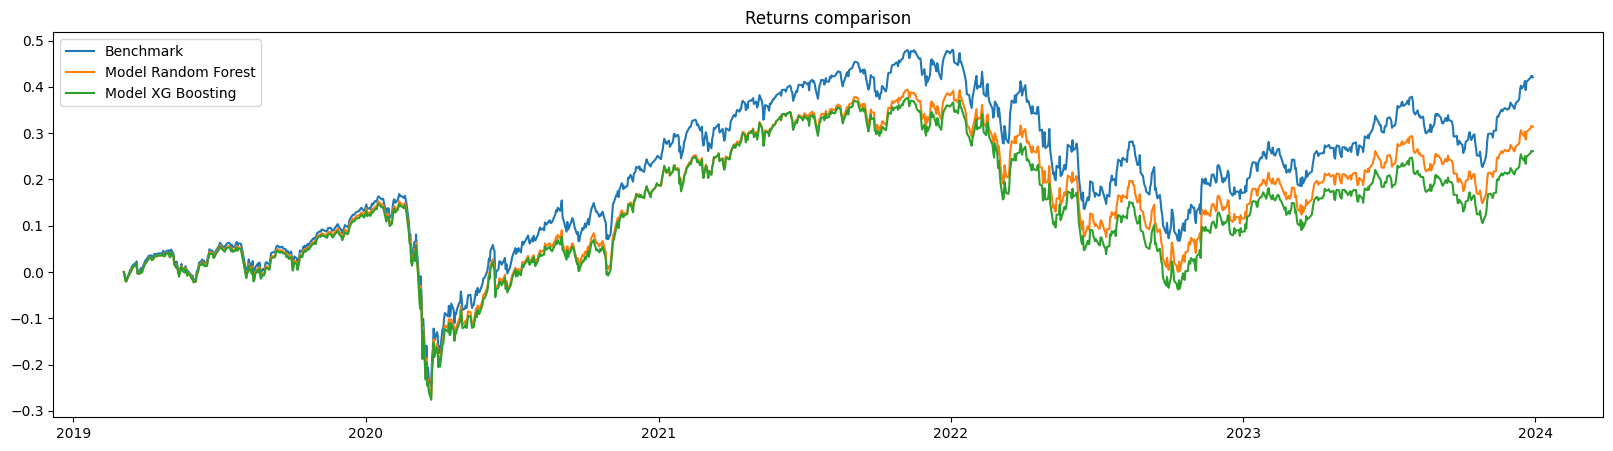

,Annual Returns,Annual Volatility,Sharpe Ratio,Sortino Ratio,Max Drawdown,Max Time Under Water,Calmar Ratio,Information Ratio
Benchmark,0.076754,0.203326,0.377494,0.442047,-0.354829,500.0,0.216313,0
Model Random Forest,0.058922,0.202481,0.290999,0.338303,-0.366599,538.0,0.160725,-0.67986
Model XG Boosting,0.049907,0.203106,0.245721,0.284793,-0.369245,538.0,0.135161,-0.779504


In [18]:
models = {
    'Model Random Forest': (regressor_random_forest, x_test),
    'Model XG Boosting': (regressor_xg_boosting, x_test)
}

df_results = run_full_backtesting(data_provider, models)
df_results